# Are Rosetta's range rate residuals explained by tracking signal lag?
    
Range rate residual oscillations similar to those of NEAR's post-encounter Doppler were reported for Rosetta's 2005 Earth flyby, which also had an anomalous $\Delta v$ [2].
    
They are similarly reproduced below by simulation of light-time lags in the tracking signal. They incidentally vanish if the initial state for the orbital elements is taken 3 or more days before perigee, as the initial lag is then too small to inflict a significant change at and through the perigee.


In [1]:
from astropy import units as u
from astropy import constants as const
from astropy.time import Time
    
from poliastro.util import norm
from poliastro.frames import Planes
from poliastro.ephem import Ephem
from poliastro.bodies import Earth
    
from poliastro.twobody.orbit import Orbit
from poliastro.twobody.sampling import EpochsArray
    
from astropy.coordinates import solar_system_ephemeris
    
import numpy as np
import sys
sys.path.append('../')
    
from sim.stations import dss25, esNewNorcia
from sim.tracking import Tracking
from sim.util import describe_orbit, describe_state, describe_trajectory, compare_orbits
    
solar_system_ephemeris.set("de440")
rosetta_start = Tracking.ROSETTA05_PERIGEE.value - 2.5*u.day
rosetta_end = Tracking.ROSETTA05_PERIGEE.value + 2*u.day

In [2]:
sampling_interval = 1800
sample_offsets = np.arange(0, (rosetta_end-rosetta_start)/(1*u.s), sampling_interval)
flyby_epochs = rosetta_start + (sample_offsets << u.s)
print("Start and end epochs:", flyby_epochs[0], flyby_epochs[-1], "[", flyby_epochs.size, "]")

Start and end epochs: 2005-03-02 10:09:14.000 2005-03-06 21:39:14.000 [ 216 ]


In [3]:
rosetta_reference_ephem = Ephem.from_horizons("Rosetta", rosetta_start, attractor=Earth, plane=Planes.EARTH_EQUATOR)
rosetta_reference_start_rv = rosetta_reference_ephem.rv(rosetta_start)
describe_state(rosetta_reference_start_rv, esNewNorcia, rosetta_start)


:AT: 2005-03-02 10:09:14.000
Geocentric distance: 915031.7192862619 km speed: 3.9778613815299204 km / s
From New Norcia : range  915918.5432640166 km , range rate  -4.3715887597001775 km / s


In [4]:
rosetta_reference_orbit = Orbit.from_vectors(Earth, rosetta_reference_start_rv[0], rosetta_reference_start_rv[1], rosetta_start)
describe_orbit(rosetta_reference_orbit)


::ORBIT::
Plane: Planes.EARTH_EQUATOR
Inclination: 144.82238427342534 deg
Eccentricity: 1.292627130280377
Semilatus rectum: 17884.71576022159 km
Semimajor axix: -26658.39671636818 km
Periapse radius: 7800.970128986643 km , altitude: 1422.8335289866436 km


In [5]:
rosetta_reference_ephem = rosetta_reference_orbit.to_ephem(EpochsArray(flyby_epochs))
describe_trajectory(rosetta_reference_ephem, esNewNorcia)


::TRAJECTORY::
Start and end ranges: 908044.5864620775 km 730873.1557984062 km
Start and end radial speeds: -4.371588759700371 km / s 4.011029505371629 km / s
Closest: 12264.917512605693 km speed 10.711376620361275 km / s  at  2005-03-04 22:09:14.000
Deflection: 101.31243228608156 deg


In [7]:
sim_meas_newnorcia = []
    
for e in flyby_epochs[:-1]:
    ref_r, ref_rr, ref_ra, ref_rs = esNewNorcia.range_rate_accel(rosetta_reference_ephem, e)
    sim_meas_newnorcia.append([ref_rr - ref_ra*ref_r/const.c])
    
print(sim_meas_newnorcia)

[[<Quantity -4.3715753 km / s>], [<Quantity -4.3761108 km / s>], [<Quantity -4.37379121 km / s>], [<Quantity -4.36465492 km / s>], [<Quantity -4.34885836 km / s>], [<Quantity -4.32667447 km / s>], [<Quantity -4.29848907 km / s>], [<Quantity -4.26479505 km / s>], [<Quantity -4.22618466 km / s>], [<Quantity -4.18333969 km / s>], [<Quantity -4.13701986 km / s>], [<Quantity -4.08804956 km / s>], [<Quantity -4.03730312 km / s>], [<Quantity -3.98568899 km / s>], [<Quantity -3.93413301 km / s>], [<Quantity -3.88356135 km / s>], [<Quantity -3.8348832 km / s>], [<Quantity -3.78897389 km / s>], [<Quantity -3.74665863 km / s>], [<Quantity -3.70869727 km / s>], [<Quantity -3.67577051 km / s>], [<Quantity -3.64846777 km / s>], [<Quantity -3.62727687 km / s>], [<Quantity -3.61257597 km / s>], [<Quantity -3.6046276 km / s>], [<Quantity -3.60357509 km / s>], [<Quantity -3.60944111 km / s>], [<Quantity -3.62212867 km / s>], [<Quantity -3.64142404 km / s>], [<Quantity -3.66700179 km / s>], [<Quantity -3

In [8]:
rosetta_newnorcia_ephem = Ephem.from_horizons("Rosetta", rosetta_end, attractor=Earth, plane=Planes.EARTH_EQUATOR)
rosetta_newnorcia_start_rv = rosetta_newnorcia_ephem.rv(rosetta_end)
describe_state(rosetta_newnorcia_start_rv, esNewNorcia, rosetta_end)
    
rosetta_newnorcia_orbit = Orbit.from_vectors(Earth, rosetta_newnorcia_start_rv[0], rosetta_newnorcia_start_rv[1], rosetta_end)
describe_orbit(rosetta_newnorcia_orbit)


:AT: 2005-03-06 22:09:14.000
Geocentric distance: 741806.564067779 km speed: 3.9906083712949365 km / s
From New Norcia : range  735473.4650517753 km , range rate  4.025773810376044 km / s

::ORBIT::
Plane: Planes.EARTH_EQUATOR
Inclination: 144.89523778986052 deg
Eccentricity: 1.301158125781254
Semilatus rectum: 18601.337528014556 km
Semimajor axix: -26841.273973042345 km
Periapse radius: 8083.467763302583 km , altitude: 1705.3311633025833 km


In [9]:
from sim.fitorbit import OrbitFitter
fitter = OrbitFitter(rosetta_reference_orbit, [esNewNorcia], var=0.001, debug=True, max_iter=20)

Range constraints:
a: -26631738.319651812 -26685055.113084543
ecc: 1.2913345031500965 1.2939197574106571
inc: 2.5250998087235685 2.530155063595888
max iter: 20


In [13]:
fitter.fit_doppler_data(flyby_epochs[:-1], sim_meas_newnorcia)
print(fitter.report())
print('Time elapsed (hh:mm:ss.ms) {}'.format(fitter.runtime))

-1. 0.5072117787329978 {'a': -26658396.71636818, 'ecc': 1.292627130280377, 'inc': 2.527627436159728, 'nu': -2.4318008549508234, 'raan': 2.9690208005401773, 'argp': 2.5154974607386746}
0. 0.5072117787329978 {'a': -26658396.71636818, 'ecc': 1.292627130280377, 'inc': 2.527627436159728, 'nu': -2.4318008549508234, 'raan': 2.9690208005401773, 'argp': 2.5154974607386746}
1. 0.5072117787329978 {'a': -26658396.71636818, 'ecc': 1.292627130280377, 'inc': 2.527627436159728, 'nu': -2.4318008549508234, 'raan': 2.9690208005401773, 'argp': 2.5154974607386746}
2. 0.5072117787329978 {'a': -26658396.71636818, 'ecc': 1.292627130280377, 'inc': 2.527627436159728, 'nu': -2.4318008549508234, 'raan': 2.9690208005401773, 'argp': 2.5154974607386746}
3. 0.5072117787329978 {'a': -26658396.71636818, 'ecc': 1.292627130280377, 'inc': 2.527627436159728, 'nu': -2.4318008549508234, 'raan': 2.9690208005401773, 'argp': 2.5154974607386746}
4. 0.5072117317356367 {'a': -26658396.71636818, 'ecc': 1.292627130280377, 'inc': 2.5

In [14]:
describe_orbit(fitter.orbit)
describe_trajectory(fitter.ephem, esNewNorcia)


::ORBIT::
Plane: Planes.EARTH_EQUATOR
Inclination: 144.82238427342534 deg
Eccentricity: 1.292627130280377
Semilatus rectum: 17884715.76022159 m
Semimajor axix: -26658396.71636818 m
Periapse radius: 7800970.128986643 m , altitude: 1422833.528986643 m

::TRAJECTORY::
Start and end ranges: 908044.5864636342 km 723691.6480183306 km
Start and end radial speeds: -4.3715887597002 km / s 3.968465032166371 km / s
Closest: 12264.917513902577 km speed 10.711376620757132 km / s  at  2005-03-04 22:09:14.000
Deflection: 101.31188418926541 deg


In [15]:
print(fitter.result.residual)

[-1.34645362e-02 -1.84752441e-03  9.60410235e-03  2.06942688e-02
  3.12352865e-02  4.10510758e-02  4.99801827e-02  5.78785512e-02
  6.46219920e-02  7.01082933e-02  7.42589278e-02  7.70203127e-02
  7.83645889e-02  7.82898959e-02  7.68201327e-02  7.40042022e-02
  6.99147581e-02  6.46464803e-02  5.83139217e-02  5.10489799e-02
  4.29980577e-02  3.43189839e-02  2.51777699e-02  1.57452828e-02
  6.19391103e-03 -3.30570228e-03 -1.25877878e-02 -2.14943804e-02
 -2.98779982e-02 -3.76040257e-02 -4.45527703e-02 -5.06211678e-02
 -5.57241221e-02 -5.97954774e-02 -6.27886224e-02 -6.46767372e-02
 -6.54526995e-02 -6.51286662e-02 -6.37353564e-02 -6.13210594e-02
 -5.79503949e-02 -5.37028535e-02 -4.86711461e-02 -4.29593905e-02
 -3.66811633e-02 -2.99574456e-02 -2.29144899e-02 -1.56816360e-02
 -8.38910356e-03 -1.16578883e-03  5.86290595e-03  1.25771806e-02
  1.88648529e-02  2.46232517e-02  2.97609524e-02  3.41993250e-02
  3.78738597e-02  4.07352381e-02  4.27501217e-02  4.39016300e-02
  4.41894882e-02  4.36298

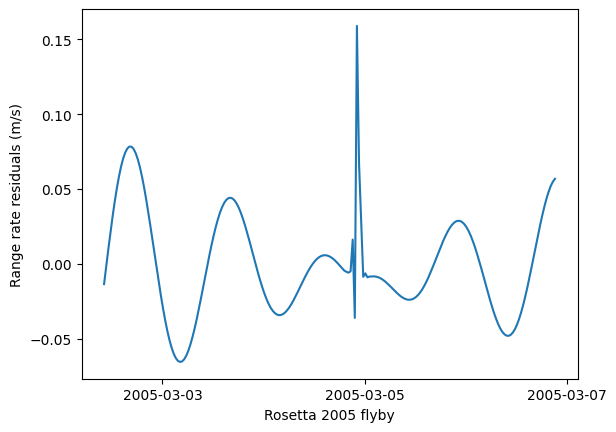

In [17]:
import matplotlib.pyplot as plt
from astropy import visualization
with visualization.time_support():
    plt.xlabel('Rosetta 2005 flyby')
    plt.ylabel('Range rate residuals (m/s)')
    plt.plot(flyby_epochs[:-1], fitter.result.residual)

In [18]:
from czml3.widget import CZMLWidget
from poliastro.czml.extract_czml import CZMLExtractor
    
czml = CZMLExtractor(flyby_epochs[0], flyby_epochs[-1], flyby_epochs.size)
dss25.add_to_czml(czml, "#333")
esNewNorcia.add_to_czml(czml, "#111")
czml.add_orbit(fitter.orbit)
    
CZMLWidget(czml.get_document())

CZMLWidget(document=Document(_values=[Preamble(id='document', version='1.0', name='document_packet', description=None, clock=IntervalValue(_start=<Time object: scale='utc' format='isot' value=2005-03-02T10:09:14.000>, _end=<Time object: scale='utc' format='isot' value=2005-03-06T21:39:14.000>, _value=Clock(currentTime=datetime.datetime(2005, 3, 2, 10, 9, 14, tzinfo=datetime.timezone.utc), multiplier=60, range=<ClockRanges.LOOP_STOP: 3>, step=<ClockSteps.SYSTEM_CLOCK_MULTIPLIER: 2>))), Packet(id='custom_properties', delete=None, name=None, parent=None, description=None, availability=None, properties={'custom_attractor': True, 'ellipsoid': [{'array': (6378136.6, 6378136.6, 6356751.9)}], 'map_url': ('https://upload.wikimedia.org/wikipedia/commons/c/c4/Earthmap1000x500compac.jpg',), 'scene3D': True}, position=None, orientation=None, viewFrom=None, billboard=None, box=None, corridor=None, cylinder=None, ellipse=None, ellipsoid=None, label=None, model=None, path=None, point=None, polygon=None, polyline=None, rectangle=None, tileset=None, wall=None), Packet(id='GS0', delete=None, name=None, parent=None, description='Goldstone-25', availability=TimeInterval(_start=<Time object: scale='utc' format='isot' value=2005-03-02T10:09:14.000>, _end=<Time object: scale='utc' format='isot' value=2005-03-06T21:39:14.000>), properties=None, position=Position(epoch=None, interpolationAlgorithm=None, interpolationDegree=None, delete=None, referenceFrame=None, cartesian=[-2354672.4950796734, -4646256.129838812, 3668480.5274884254], cartographicRadians=None, cartographicDegrees=None, cartesianVelocity=None, reference=None), orientation=None, viewFrom=None, billboard=Billboard(horizontalOrigin=None, verticalOrigin=None, image='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAACvSURBVDhPrZDRDcMgDAU9GqN0lIzijw6SUbJJygUeNQgSqepJTyHG91LVVpwDdfxM3T9TSl1EXZvDwii471fivK73cBFFQNTT/d2KoGpfGOpSIkhUpgUMxq9DFEsWv4IXhlyCnhBFnZcFEEuYqbiUlNwWgMTdrZ3JbQFoEVG53rd8ztG9aPJMnBUQf/VFraBJeWnLS0RfjbKyLJA8FkT5seDYS1Qwyv8t0B/5C2ZmH2/eTGNNBgMmAAAAAElFTkSuQmCC', show=True, scale=None, eyeOffset=None), box=None, corridor=None, cylinder=None, ellipse=None, ellipsoid=None, label=Label(horizontalOrigin=None, verticalOrigin=None, show=True, text=None, font='11pt Lucida Console', style=<LabelStyles.FILL: 1>, scale=None, showBackground=None, backgroundColor=None, fillColor=Color(epoch=None, interpolationAlgorithm=None, interpolationDegree=None, delete=None, rgba='#333', rgbaf=None), outlineColor=None, outlineWidth=1.0, pixelOffset=None), model=None, path=None, point=None, polygon=None, polyline=None, rectangle=None, tileset=None, wall=None), Packet(id='GS1', delete=None, name=None, parent=None, description='New Norcia', availability=TimeInterval(_start=<Time object: scale='utc' format='isot' value=2005-03-02T10:09:14.000>, _end=<Time object: scale='utc' format='isot' value=2005-03-06T21:39:14.000>), properties=None, position=Position(epoch=None, interpolationAlgorithm=None, interpolationDegree=None, delete=None, referenceFrame=None, cartesian=[-2413971.281821305, 4907675.176738348, -3270475.1545193326], cartographicRadians=None, cartographicDegrees=None, cartesianVelocity=None, reference=None), orientation=None, viewFrom=None, billboard=Billboard(horizontalOrigin=None, verticalOrigin=None, image='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAACvSURBVDhPrZDRDcMgDAU9GqN0lIzijw6SUbJJygUeNQgSqepJTyHG91LVVpwDdfxM3T9TSl1EXZvDwii471fivK73cBFFQNTT/d2KoGpfGOpSIkhUpgUMxq9DFEsWv4IXhlyCnhBFnZcFEEuYqbiUlNwWgMTdrZ3JbQFoEVG53rd8ztG9aPJMnBUQf/VFraBJeWnLS0RfjbKyLJA8FkT5seDYS1Qwyv8t0B/5C2ZmH2/eTGNNBgMmAAAAAElFTkSuQmCC', show=True, scale=None, eyeOffset=None), box=None, corridor=None, cylinder=None, ellipse=None, ellipsoid=None, label=Label(horizontalOrigin=None, verticalOrigin=None, show=True, text=None, font='11pt Lucida Console',

See [screenshot](rosetta_sim_approach_rangerate.png)
